In [51]:

import pandas as pd
import numpy as np


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
#Read the “housing.csv” file from the folder into the program & Print first few rows of this data
Housing = pd.read_csv('housing.csv')
Housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [54]:
#Extract input (X) and output (Y) data from the dataset.
Housing = pd.read_csv('housing.csv')

# Extract the input features (X) and the output variable (Y)
X = Housing.iloc[:, :-1]  # Select all columns except the last one
Y = Housing.iloc[:, -1]   # Select the last column

# Extract input (X) and output (Y) data from the dataset
X = Housing.drop('median_house_value', axis=1)
Y = Housing['median_house_value']

# Handle missing values by filling them with the mean of the respective column
X.fillna(X.mean(), inplace=True)

# Print the first few rows of X and Y
print("Input features (X):")
print(X.head())
print("\nOutput variable (Y):")
print(Y.head())

Input features (X):
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  
0         322         126         8.3252        NEAR BAY  
1        2401        1138         8.3014        NEAR BAY  
2         496         177         7.2574        NEAR BAY  
3         558         219         5.6431        NEAR BAY  
4         565         259         3.8462        NEAR BAY  

Output variable (Y):
0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64


C:\Users\bhavna\AppData\Local\Temp\ipykernel_17256\818866884.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


In [55]:
#Fill the missing values with the mean of the respective column.

# Fill missing values with column means
Housing = Housing.fillna(Housing.mean())

# Print the first few rows of the updated DataFrame
print(Housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


C:\Users\bhavna\AppData\Local\Temp\ipykernel_17256\4281865391.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Housing = Housing.fillna(Housing.mean())


In [56]:
#Convert categorical column in the dataset to numerical data.
Housing = pd.get_dummies(Housing)

# Print the first few rows of the updated DataFrame
print(Housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1   

In [61]:
#Split the data into 80% training dataset and 20% test dataset & # Perform Linear Regression : Standardize training and test datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the "housing.csv" file from the folder
Housing = pd.read_csv("housing.csv")

# Extract input (X) and output (Y) data from the dataset
X = Housing.drop('median_house_value', axis=1)
Y = Housing['median_house_value']

# Handle missing values by filling them with the mean of the respective column
X.fillna(X.mean(), inplace=True)

# Encode categorical data by converting the categorical column to numerical data
X = pd.get_dummies(X, columns=['ocean_proximity'])

# Split the data into 80% training dataset and 20% test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Standardize the training and test datasets
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Print the dimensions of the training and test sets
print("Dimensions of training set:", X_train.shape)
print("Dimensions of test set:", X_test.shape)

# Print the standardized training and test datasets
print("Standardized training dataset:")
print(X_train)
print("\nStandardized test dataset:")
print(X_test)


Dimensions of training set: (16512, 13)
Dimensions of test set: (4128, 13)
Standardized training dataset:
[[ 1.00389865 -0.8400624  -1.79507596 ... -0.01348032 -0.35239609
  -0.38649771]
 [-1.43477229  0.98536392  1.85553889 ... -0.01348032  2.83771591
  -0.38649771]
 [ 0.77948108 -0.8400624  -0.20785212 ... -0.01348032 -0.35239609
  -0.38649771]
 ...
 [-1.1654712   0.44709718  0.18895385 ... -0.01348032 -0.35239609
   2.58733744]
 [ 0.81439048 -0.93835459  0.42703742 ... -0.01348032 -0.35239609
  -0.38649771]
 [ 1.99632302 -1.32216217 -1.08082523 ... -0.01348032 -0.35239609
  -0.38649771]]

Standardized test dataset:
[[ 1.2532515  -1.42513494 -0.52529688 ... -0.01348032 -0.35239609
   2.58733744]
 [ 0.79444225 -0.79793718  0.26831504 ... -0.01348032 -0.35239609
  -0.38649771]
 [-1.13554886  1.41597731  0.03023146 ... -0.01348032 -0.35239609
  -0.38649771]
 ...
 [-0.67673961  1.51426949 -1.39827    ... -0.01348032 -0.35239609
  -0.38649771]
 [-1.19040649  1.09301727 -0.84274165 ... -0.

C:\Users\bhavna\AppData\Local\Temp\ipykernel_17256\488320770.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


In [67]:
# Perform Linear Regression on training data.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = lr.predict(X_test)

# Printing the RMSE from linear regression
print('Linear Regression Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))

Linear Regression Root Mean Squared Error: 68689.20561705148


In [74]:
# Perform decision tree regression to the training set
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = dt.predict(X_test)

# Printing the RMSE from decision tree regression
print('Decision Tree Regression Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))

Decision Tree Regression Root Mean Squared Error: 67967.01649936427


In [76]:
# Perform Random Forest regression to the training set
from sklearn.ensemble import RandomForestRegressor

# create a random forest regression object
rfr = RandomForestRegressor(random_state=0)

# fit the model on the training data
rfr.fit(X_train, Y_train)

# predict the output for test data using the fitted model
Y_pred_rfr = rfr.predict(X_test)

# calculate the root mean squared error (RMSE)
rmse_rfr = mean_squared_error(Y_test, Y_pred_rfr, squared=False)
print("Root Mean Squared Error (Random Forest Regression):", rmse_rfr)




Root Mean Squared Error (Random Forest Regression): 48204.21177764986


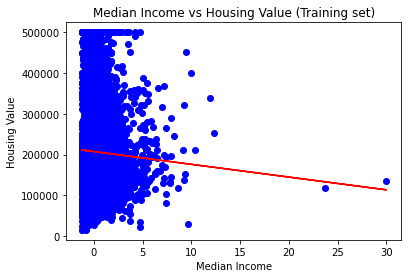

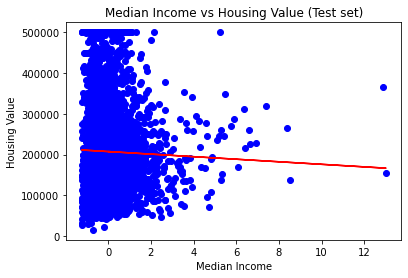

In [78]:
#Perform Linear Regression with one independent variable

# extract median_income column from X_train and X_test
X_train_median_income = X_train[:, 5].reshape(-1, 1)
X_test_median_income = X_test[:, 5].reshape(-1, 1)

# create a linear regression object
lr_median_income = LinearRegression()

# fit the model on the training data
lr_median_income.fit(X_train_median_income, Y_train)

# predict the output for training data using the fitted model
Y_pred_train_median_income = lr_median_income.predict(X_train_median_income)

# predict the output for test data using the fitted model
Y_pred_test_median_income = lr_median_income.predict(X_test_median_income)

# plot the fitted model for training data and test data
import matplotlib.pyplot as plt

plt.scatter(X_train_median_income, Y_train, color='blue')
plt.plot(X_train_median_income, Y_pred_train_median_income, color='red')
plt.title('Median Income vs Housing Value (Training set)')
plt.xlabel('Median Income')
plt.ylabel('Housing Value')
plt.show()

plt.scatter(X_test_median_income, Y_test, color='blue')
plt.plot(X_test_median_income, Y_pred_test_median_income, color='red')
plt.title('Median Income vs Housing Value (Test set)')
plt.xlabel('Median Income')
plt.ylabel('Housing Value')
plt.show()
